<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/2216155_AIML_Bootcamp_2023/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading the data**

In [12]:
import numpy as np

im

In [1]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [2]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


**Feature Engineering**

In [3]:
#feature Engineering

#df.drop(['A'], axis=1)
df=df.drop(['User ID','Gender'],axis =1)

In [4]:
#method 1

#setting the data into input and output values
X=df.iloc[:,:-1].values #iloc==>index location 2D array
Y=df.iloc[:,-1:].values #2D array

In [5]:
#Training and Testing the dataset
#more data-Trainig; Less data-Testing datai.e Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

**Normalizing the data-Standard Scalar**

In [6]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

**Build Model**

In [7]:
from sklearn.neighbors import   KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=20)

**Training-fitting the data**

In [8]:
knn_clf.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

**Testing the model**

In [9]:
y_pred=knn_clf.predict(X_test)

In [10]:
print("predicted value for training data",knn_clf.score(X_train,Y_train))
print("predicted value for training data",knn_clf.score(X_test,Y_test))
print("overall accuracy",knn_clf.score(sst.transform(X),Y));

predicted value for training data 0.903125
predicted value for training data 0.95
overall accuracy 0.9125


**Cross Validation-to find the best K value and make trails**

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

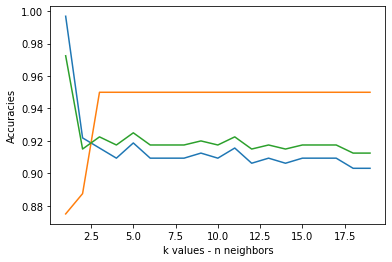

In [14]:
neighbors = np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#Loop over K values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)

  #Compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(X_train,Y_train)
  test_accuracy[i]=knn.score(X_test,Y_test)

  #overall score
  overall_accuracy[i]=knn.score(sst.transform(X),Y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')

plt.xlabel('k values - n neighbors')
plt.ylabel("Accuracies")
plt.show()


